## Observations and Insights 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how = "left")

# Display the data table for preview
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [74]:
# Checking the number of mice.
merge_df.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [77]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_duplicates = merge_df.loc[merge_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicates


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [79]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = merge_df[merge_df["Mouse ID"].isin(mouse_duplicates)== False]
clean_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [83]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df["Mouse ID"].unique())


248

## Summary Statistics

In [88]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regim


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen_mean = clean_data_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
drug_regimen_mean

# drug_regimen_mean = drug_regimen_grouped.mean()["Tumor Volume (mm3)"]
# drug_regimen_mean


drug_regimen_median = clean_data_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
drug_regimen_median


drug_regimen_variance = clean_data_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
drug_regimen_variance


drug_regimen_stdev = clean_data_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
drug_regimen_stdev


drug_regimen_sem = clean_data_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
drug_regimen_sem



Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [89]:
# Assemble the resulting series into a single summary dataframe.

summary_statistics = pd.DataFrame({"Mean": drug_regimen_mean, "Median": drug_regimen_median, "Variance": drug_regimen_variance, "Standard Deviation": drug_regimen_stdev, "SEM": drug_regimen_sem})

summary_statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [93]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Using the aggregation method, produce the same summary statistics in a single line
aggregate_data = clean_data_df.groupby("Drug Regimen").aggregate({"Tumor Volume (mm3)"}: ["mean", "median", "var", "std", "sem"])
                                                                                         
aggregate_data 

SyntaxError: invalid syntax (<ipython-input-93-c9e265d458ed>, line 5)

## Bar and Pie Charts

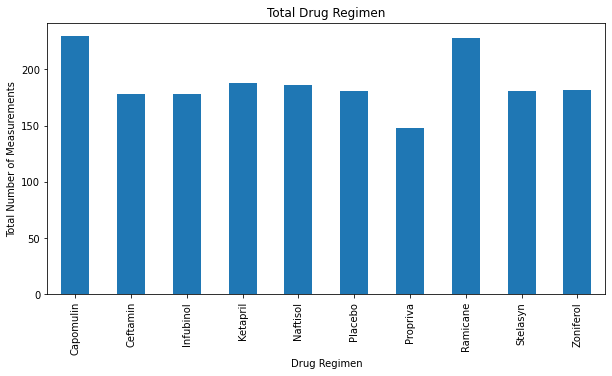

In [94]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_count = clean_data_df.groupby(["Drug Regimen"]).count()["Tumor Volume (mm3)"]
regimen_count

regimen_count.plot(kind = "bar", figsize = (10,5))
plt.title("Total Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.show()

In [99]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = (len(regimen_count))
plt.figure(figsize=(8,8))
plt.bar(x_axis, regimen_count["Drug Regimen"], color=blue, align = center)

plt.title("Total Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

plt.show()


KeyError: 'Drug Regimen'

<Figure size 576x576 with 0 Axes>

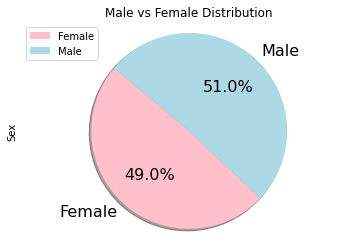

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = clean_data_df.groupby("Sex")
groupby_gender

groupby_gender_count = pd.DataFrame(groupby_gender["Sex"].count())

groupby_gender_count.head()

groupby_gender_count.plot(kind="pie", y="Sex", title = "Male vs Female Distribution", startangle=140, autopct = "%1.1f%%", shadow=True, fontsize = 16, colors = ["pink", "lightblue"])

plt.axis("equal")
plt.show()


# colors = ["pink", "blue"]

# plot = groupby_gender.plot.pie(y="Sex", figsize=(5,5), colors = colors, startangle = 180, autopct = "%1.1f%%")

# plt.title("Male vs Female Distribution")




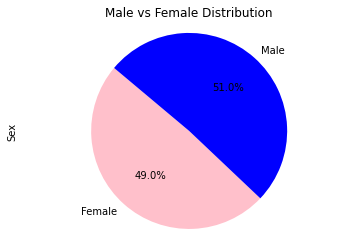

In [103]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = list(groupby_gender_count.index.values)

gender_counts = groupby_gender_count["Sex"]

colors = ["pink", "blue"]

plt.pie(gender_counts, labels=genders, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Male vs Female Distribution")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [115]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# regimen_treatments = clean_data_df.groupby(["Drug Regimen", "Mouse ID"])
# regimen_treatments.head()


# four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# four_treatments_list = clean_data_df[clean_data_df["Drug Regimen"].isin(four_treatments)]

# four_treatments_list.head()





# last_tumor_size = last_four_timepoint["Tumor Volume (mm3)"]
# last_tumor_size.head()


# # Start by getting the last (greatest) timepoint for each mouse

last_four_timepoint = clean_data_df.groupby(["Mouse ID"]).max()["Timepoint"]


last_four_timepoint = last_four_timepoint.reset_index()

last_four_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merge_timepoint = pd.merge(last_four_timepoint, clean_data_df, on=["Mouse ID", "Timepoint"])
merge_timepoint



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [117]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in four_treatments:

       
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_timepoint.loc[merge_timepoint("Drug Regimen") == drug, "Tumor Volume (mm3)"]
      
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantiles([.25, .5, .75])
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = round(upperq-lowerq,2)


TypeError: 'DataFrame' object is not callable

## Line and Scatter Plots

In [120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
final_tumor_vol_cap = merge_timepoint.loc[merge_timepoint["Drug Regimen"] == "Capomulin"]

final_tumor_vol_cap

final_tumor_time_cap = final_tumor_vol_cap.groupby[()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


In [122]:
final_tumor_time_cap = final_tumor_vol_cap.groupby["Timepoint"] 
final_tumor_time_cap

TypeError: 'method' object is not subscriptable

In [41]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
campomulin_scatter = clean_data_df.groupby[clean_data_df["Drug Regimen"]]

campomulin_scatter.head()
# campomulin_scatter_plot = plt.scatter("average_tumor_volume", "Mouse Weight") 

# plt.title("Average Tumor Volume vs Mouse Weight for Campomulin")
# plt.xlable("Mouse Weight")
# plt.ylable("Average Tumor Volume")

TypeError: 'method' object is not subscriptable

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
#linear regression

correlation = st.pearsonr(average_tumor_volume, mouse_weight)


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor)
regress_line = slope * weight + intercept 



# for mouse weight and average tumor volume for the Capomulin regimen
